# Task3 电商销售数据分析


通过分析销售数据可以帮助商家了解在线销售业务的消费情况，进而分析用户消费数据来分析用户的消费行为，更好的为用户推荐相匹配的商品。

In [1]:
from matplotlib import font_manager
 
for font in font_manager.fontManager.ttflist:
    # 查看字体名以及对应的字体文件名
    print(font.name, '-', font.fname)

STIXSizeOneSym - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizOneSymBol.ttf
DejaVu Sans Display - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSansDisplay.ttf
STIXNonUnicode - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXNonUniIta.ttf
cmr10 - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmr10.ttf
STIXSizeOneSym - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizOneSymReg.ttf
DejaVu Sans Mono - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSansMono-Oblique.ttf
STIXSizeFourSym - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizFourSymBol.ttf
DejaVu Serif - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-Italic.ttf
DejaVu Sans Mono - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSansMono-BoldOblique.ttf
STIXSizeTwoSym - D:\Anaconda\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\STIXSizTwoSymReg.ttf
DejaVu Sans - D

### 导入第三方库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

### 导入数据

In [3]:
df = pd.read_csv('data/电子产品销售分析.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


### 查看每列数据的统计

In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,order_id,product_id,category_id,price,user_id,age
count,564169.000000,5.641690e+05,5.641690e+05,5.641690e+05,5.641690e+05,564169.000000,5.641690e+05,564169.000000
mean,282084.000000,1.792965e+06,2.370552e+18,1.695711e+18,2.272919e+18,208.269324,1.515916e+18,33.184388
std,162861.706346,7.745342e+05,2.025138e+16,3.290688e+17,2.158282e+16,304.559875,2.379056e+07,10.122088
min,0.000000,0.000000e+00,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18,16.000000
25%,141042.000000,1.658965e+06,2.353294e+18,1.515966e+18,2.268105e+18,23.130000,1.515916e+18,24.000000
50%,282084.000000,1.861597e+06,2.376886e+18,1.515966e+18,2.268105e+18,87.940000,1.515916e+18,33.000000
75%,423126.000000,2.473370e+06,2.388441e+18,1.515966e+18,2.268105e+18,277.750000,1.515916e+18,42.000000
max,564168.000000,2.633520e+06,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18,50.000000


### 将evenet_time列数据类型转为日期

In [5]:
# 数据清洗和处理
# 数据类型转化
df['event_time'] = pd.to_datetime(df['event_time'].str[:19], format="%Y-%m-%d %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0.1   564169 non-null  int64         
 1   Unnamed: 0     564169 non-null  int64         
 2   event_time     564169 non-null  datetime64[ns]
 3   order_id       564169 non-null  int64         
 4   product_id     564169 non-null  int64         
 5   category_id    564169 non-null  float64       
 6   category_code  434799 non-null  object        
 7   brand          536945 non-null  object        
 8   price          564169 non-null  float64       
 9   user_id        564169 non-null  float64       
 10  age            564169 non-null  float64       
 11  sex            564169 non-null  object        
 12  local          564169 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 56.0+ MB


### 增加月、日、时间列

In [6]:
#计算时间变量
df['Month'] = df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['hour'] = df['event_time'].dt.hour

### 查看缺失值情况

In [7]:
np.sum(df.isnull())

Unnamed: 0.1          0
Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
Month                 0
Day                   0
hour                  0
dtype: int64

### 将有缺失项的两列用missing填充

In [8]:
df['category_code'].fillna('missing',inplace=True)
df['brand'].fillna('missing',inplace=True)
np.sum(df.isnull())

Unnamed: 0.1     0
Unnamed: 0       0
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
Month            0
Day              0
hour             0
dtype: int64

In [9]:
df['category_code'].value_counts()

missing                             129370
electronics.smartphone              102697
computers.notebook                   25941
appliances.kitchen.refrigerators     20312
electronics.audio.headphone          20122
                                     ...  
kids.swing                               8
country_yard.watering                    5
sport.snowboard                          3
apparel.costume                          2
apparel.shoes                            2
Name: category_code, Length: 124, dtype: int64

### 删除重复值

In [10]:
#重复值检查和处理
df.duplicated()
df.drop_duplicates()

,Unnamed: 0.1,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,hour
0,0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
1,1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,11
2,2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
3,3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,14
4,4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564164,564164,2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,21.0,男,上海,11,21,10
564165,564165,2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,21.0,女,北京,11,21,10
564166,564166,2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,19.0,女,上海,11,21,10
564167,564167,2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,missing,moulinex,41.64,1.515916e+18,19.0,女,上海,11,21,10


### 画出每月成交金额折线图

Text(0.5, 1.0, '每月订单数量')

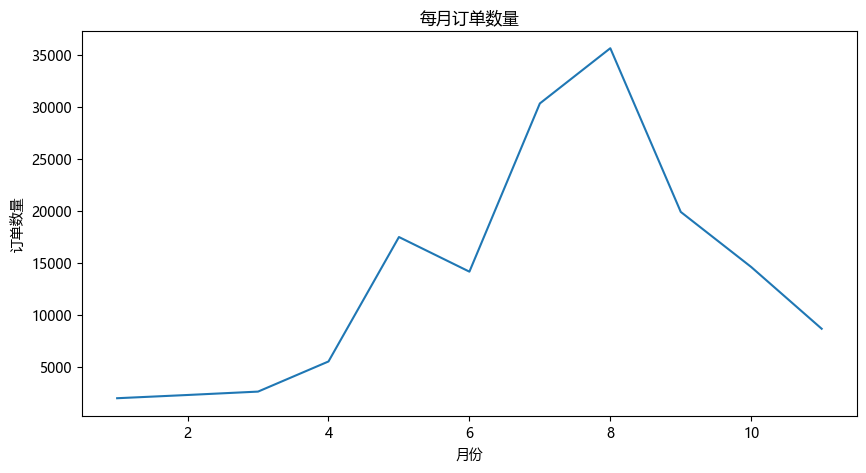

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df[df['price']>0].groupby('Month')['user_id'].nunique())
plt.xlabel('月份')
plt.ylabel('订单数量')
plt.title('每月订单数量')


### 每月消费人数的折线图

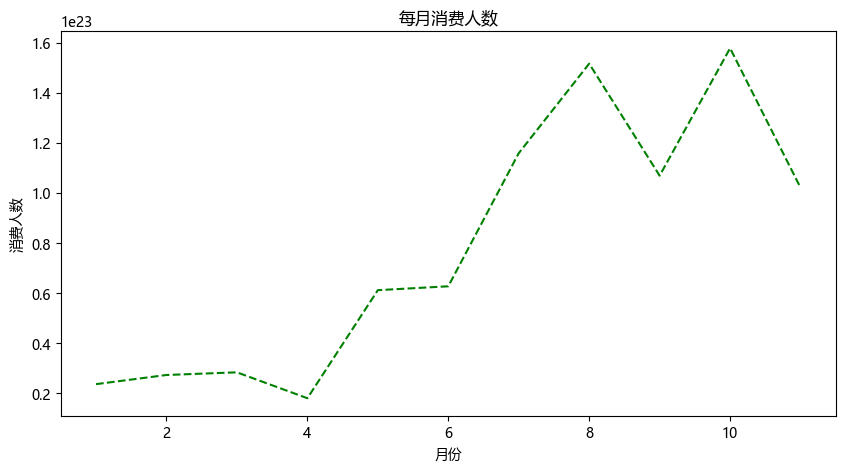

In [12]:
#方法一：
plt.figure(figsize=(10,5))
plt.plot(df[df['price']>0].groupby('Month')['user_id'].sum(), linestyle='--', color='g')
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月消费人数')
plt.show()

#方法二：
#store_plot(data=df[df['price']>0].groupby('Month')['user_id'].nunique(),
#          xlab='月份',
#          ylab='消费人数',
#          title='每月消费人数')

### 不同省份用户数量的柱状图

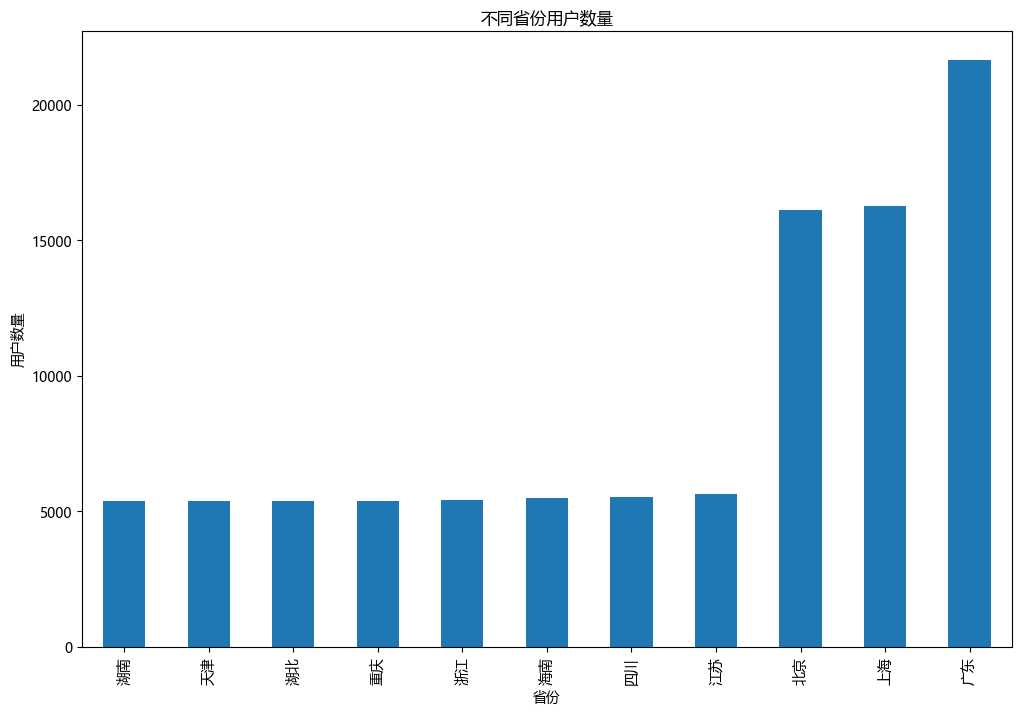

In [13]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['user_id'].nunique().sort_values(ascending=True).plot.bar()
plt.xlabel('省份')
plt.ylabel('用户数量')
plt.title('不同省份用户数量')
plt.show()

### 不同省份订单数量的水平柱状图

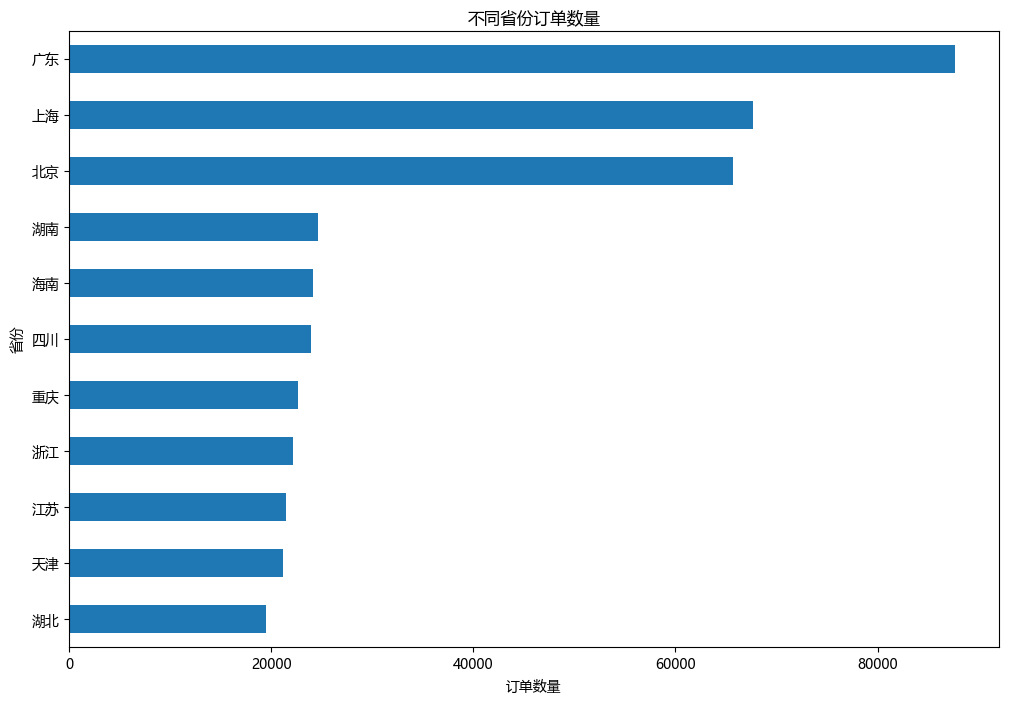

In [14]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['order_id'].nunique().sort_values(ascending=True).plot.barh()
plt.xlabel('订单数量')
plt.ylabel('省份')
plt.title('不同省份订单数量')
plt.show()

### 下单小时分布的折线图

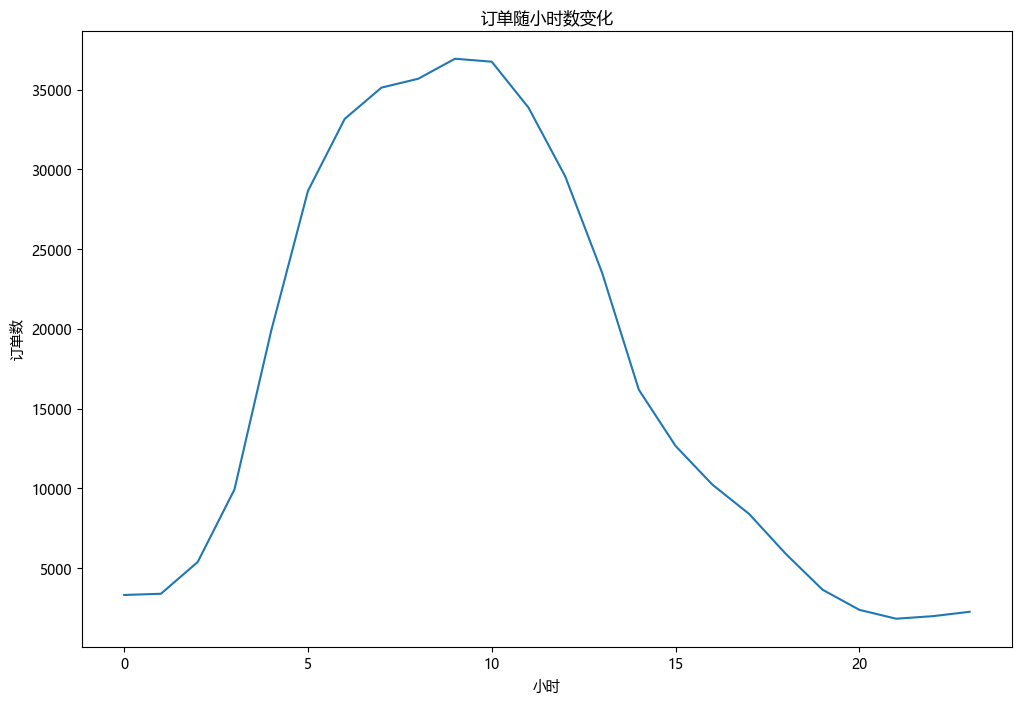

In [15]:
# 下单时间分布
# 小时
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('hour')['order_id'].nunique().plot()
plt.xlabel('小时')
plt.ylabel('订单数')
plt.title('订单随小时数变化')
plt.show()

### 查看未完成订单的数量

In [16]:
df[df['price']==0].count() 

Unnamed: 0.1     39
Unnamed: 0       39
event_time       39
order_id         39
product_id       39
category_id      39
category_code    39
brand            39
price            39
user_id          39
age              39
sex              39
local            39
Month            39
Day              39
hour             39
dtype: int64

### 消费次数与消费金额关系的散点图

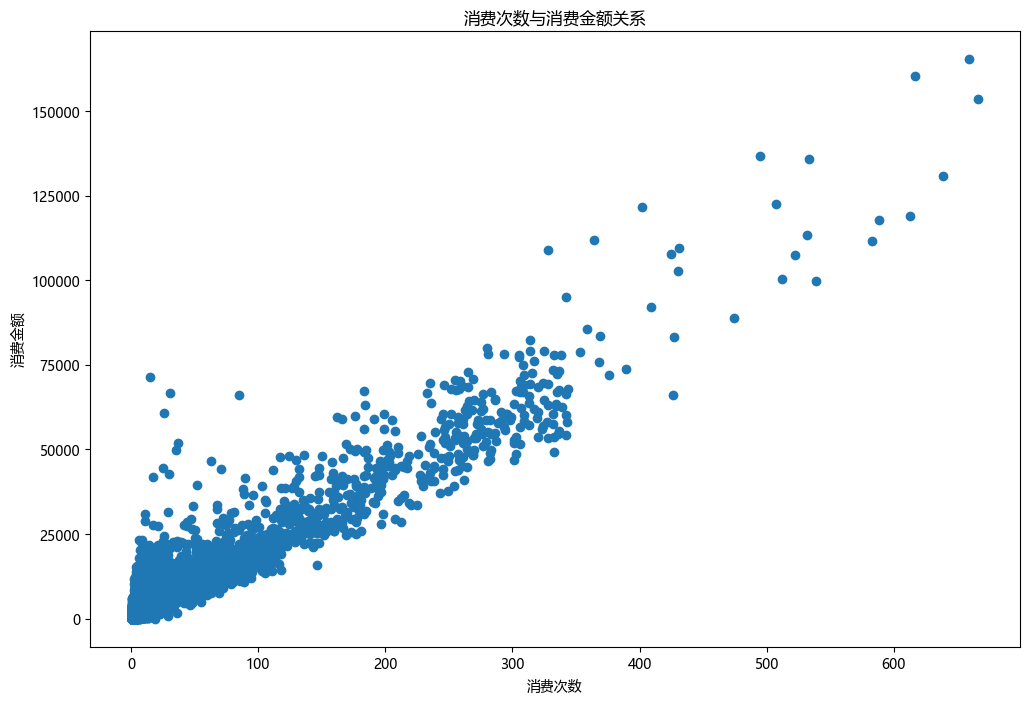

In [17]:
#消费次数与消费金额的关系
plt.figure(figsize=(12,8))
plt.scatter(x=df[df['price']>0].groupby('user_id')['order_id'].nunique(),
           y=df[df['price']>0].groupby('user_id')['price'].sum())
plt.xlabel('消费次数')
plt.ylabel('消费金额')
plt.title('消费次数与消费金额关系')
plt.show()

### 用户男女人数对比扇形图

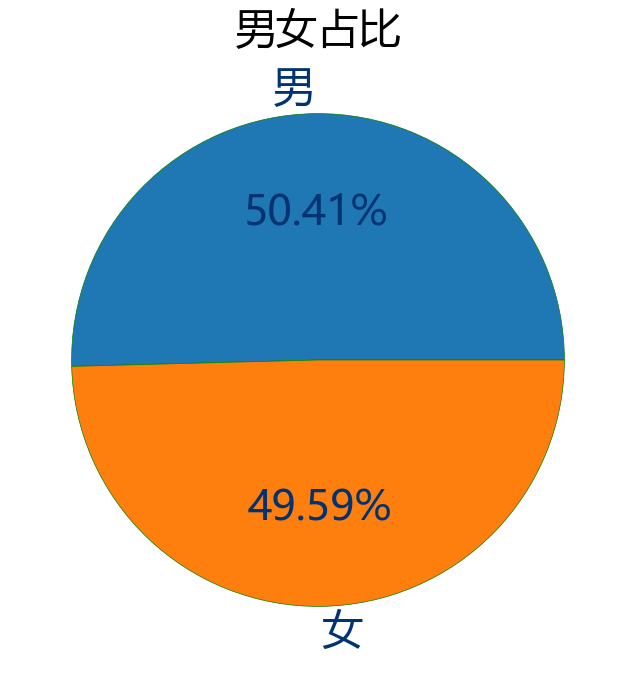

In [18]:
df_sex = df['sex'].value_counts() 
df = df[df['price']>0]
plt.figure(figsize=(8,8))

plt.pie(df_sex.values, labels=df_sex.index, autopct='%.2f%%',
       wedgeprops={'linewidth':0.5,'edgecolor':'green'},
       textprops={'fontsize':30,'color':'#003371'})

plt.title('男女占比', size=30)
plt.show()

### 年龄分布直方图

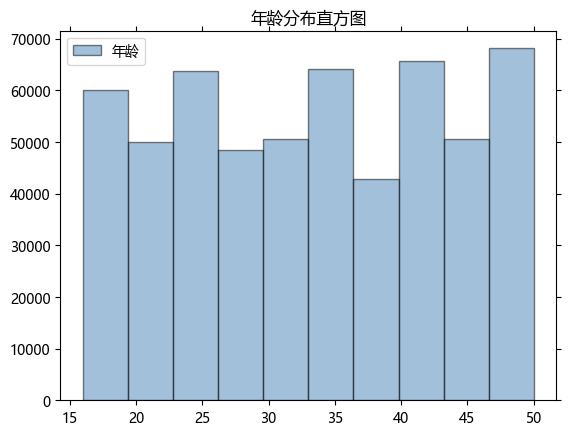

In [19]:
plt.hist(df['age'], bins=10, color='steelblue', edgecolor='k', label='年龄', alpha=0.5)
plt.title('年龄分布直方图')
plt.legend()
plt.tick_params(top='off', right='off')
plt.show()

### 将年龄离散化，增加一列age_box

In [20]:
bins = [10,20,30,40,50]
labels = ['10-20','20-30','30-40','40-50']
df['age_box'] = pd.cut(df['age'], bins, labels=labels)
age_box = df['age_box'].value_counts()[labels]
age_box

10-20     78257
20-30    159756
30-40    156550
40-50    169567
Name: age_box, dtype: int64

### 不同年龄段与购买数量的关系，画出柱状图

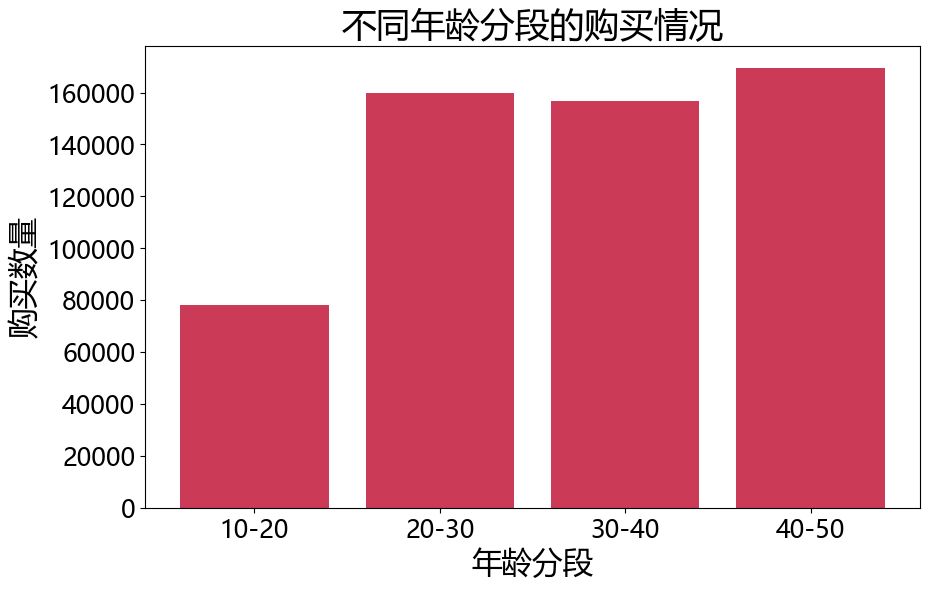

In [21]:
plt.figure(figsize=(10,6))
plt.bar(labels, age_box.values, color='#cb3a56')
plt.ylabel('购买数量', size=22)
plt.xlabel('年龄分段', size=22)
plt.xticks(size=18)
plt.yticks(size=18)

plt.title('不同年龄分段的购买情况', size=25)
plt.show()

## 小作业

### 第一题：每月订单数量的折线图

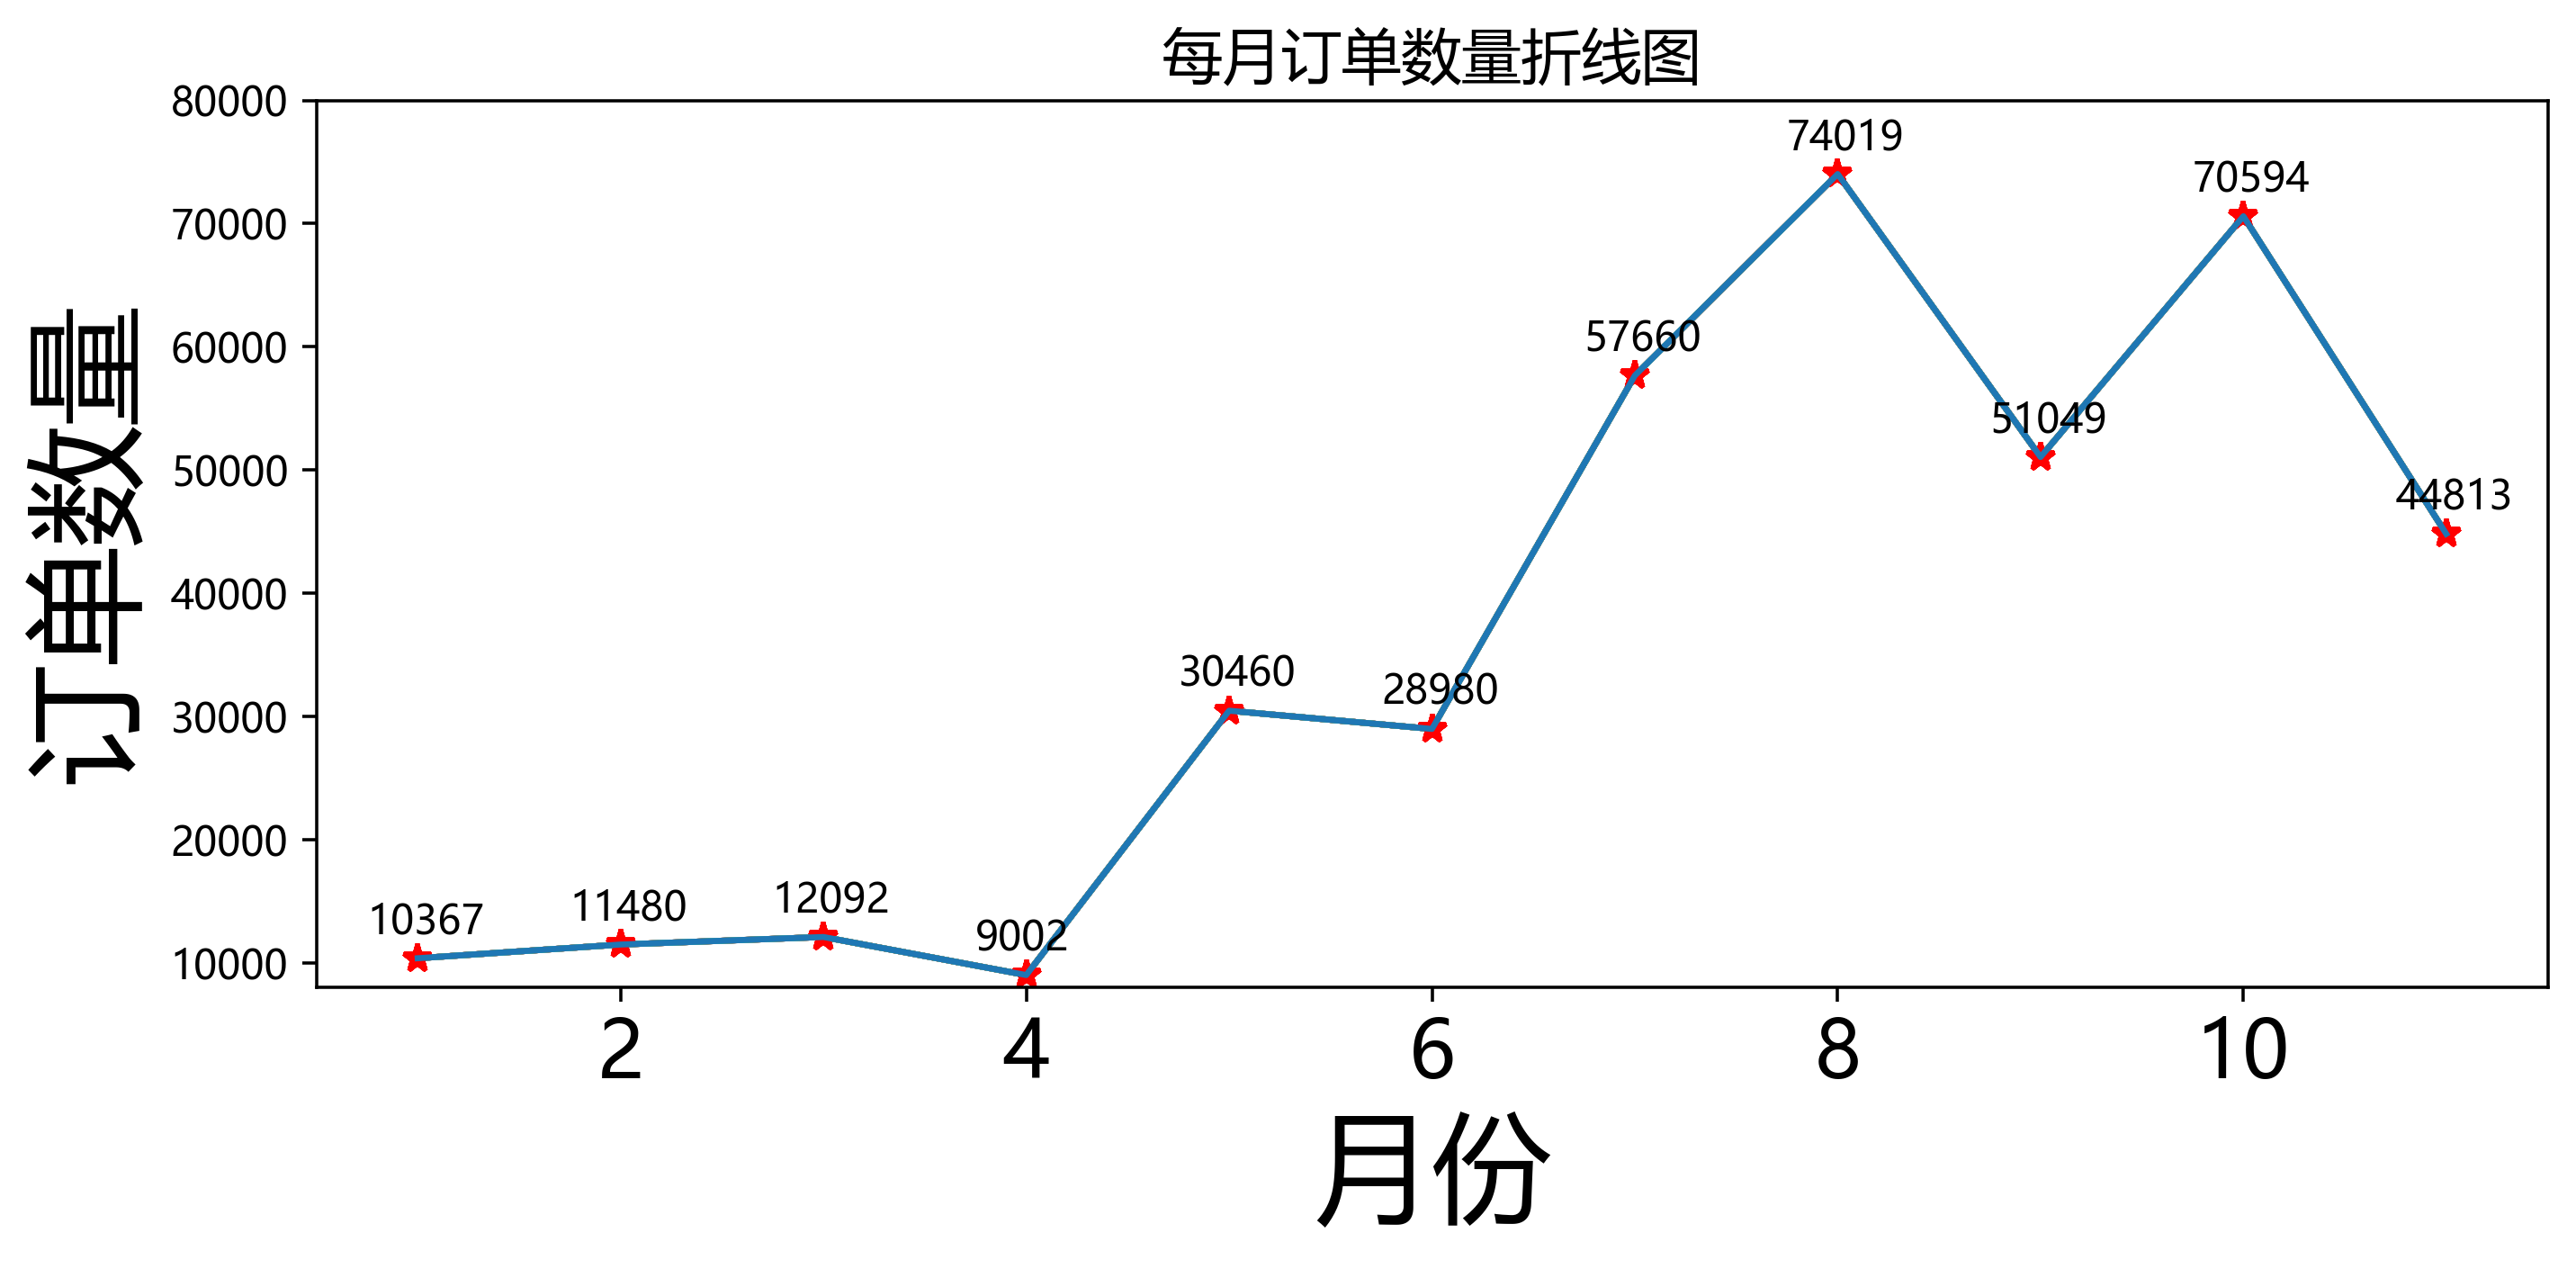

In [46]:
data1= df[df['price']>0].groupby(['Month'])['order_id'].nunique()
plt.figure(figsize=(10,4),dpi=320)

plt.xlabel('月份',fontsize=30)
plt.ylabel('订单数量',fontsize=30)
plt.xticks(fontsize=20)
plt.title('每月订单数量折线图',fontsize=15)

plt.ylim([8000,80000])

#添加文本标签c
for x,y in enumerate(data1):
    plt.text(x+0.75,y+2000,y)
  
    plt.plot(data1,color='r',linestyle=':',linewidth=1.2,marker='*',markersize=7)
    plt.plot(data1)
    
plt.show()

### 第二题：不同省份成交金额的水平柱状图

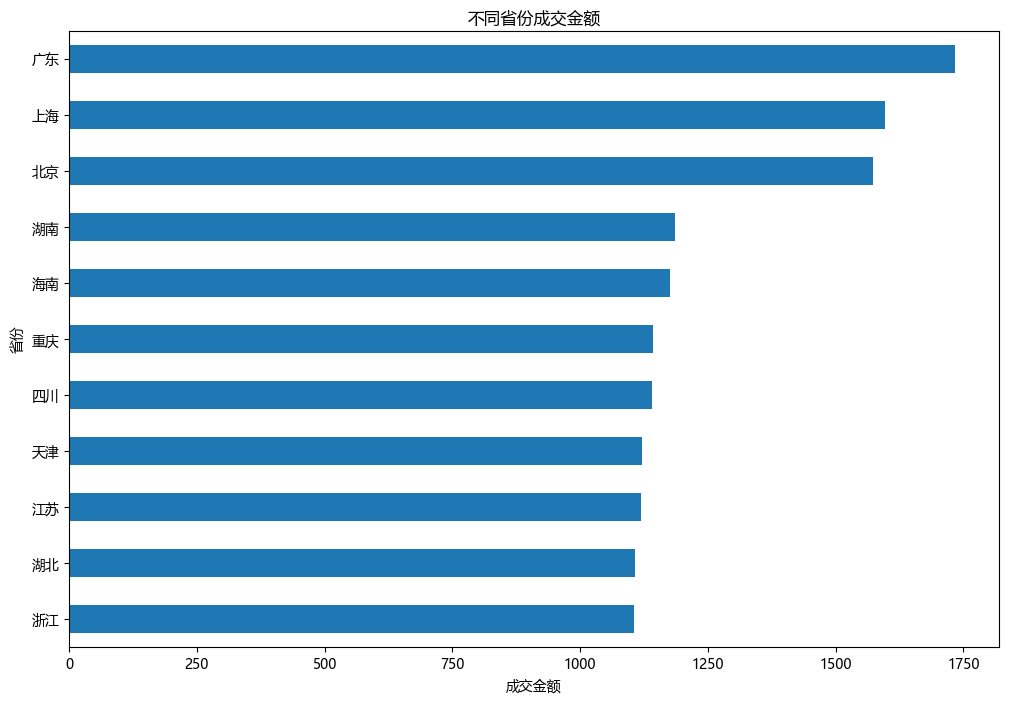

In [52]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['price'].nunique().sort_values(ascending=True).plot.barh()
plt.xlabel('成交金额')
plt.ylabel('省份')
plt.title('不同省份成交金额')
plt.show()

### 第三题：不同省份用户男女人数对比簇状柱形图

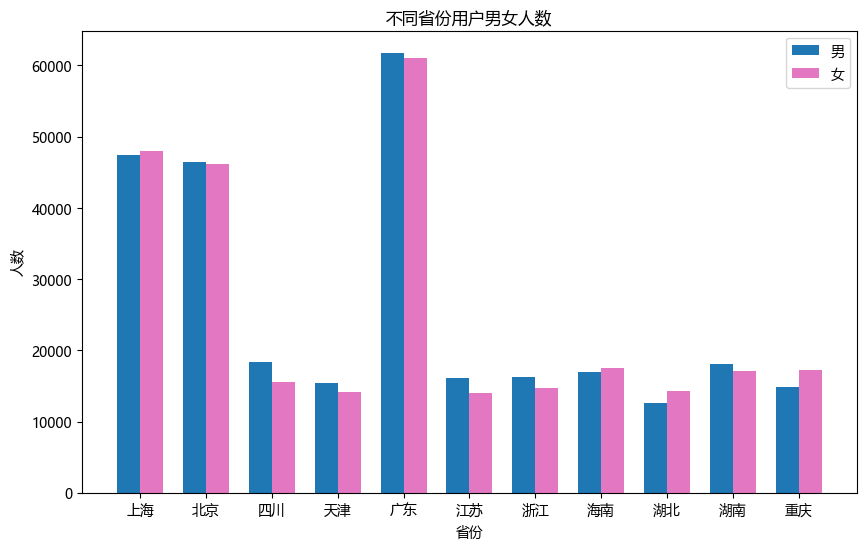

In [47]:
# 按省份和性别分组，计算每个组的数量
gender_df = df.groupby(['local', 'sex']).size().unstack()

# 绘制簇状柱形图
x = np.arange(len(gender_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, gender_df['男'], width, label='男', color='tab:blue')
ax.bar(x + width/2, gender_df['女'], width, label='女', color='tab:pink')

ax.set_xticks(x)
ax.set_xticklabels(gender_df.index)
ax.legend()
ax.set_xlabel('省份')
ax.set_ylabel('人数')
ax.set_title('不同省份用户男女人数')

plt.show()